In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from sklearn import svm
# from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
calorie = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')
exercise.shape

(15000, 8)

In [3]:
calorie.shape

(15000, 2)

In [4]:
df = pd.merge(exercise,calorie,how = 'inner', on = 'User_ID')

In [5]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape

(15000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [8]:
sns.set()

In [9]:
df['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

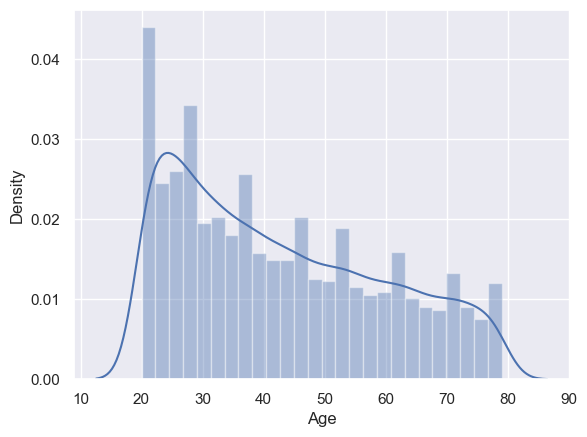

In [10]:
sns.distplot(df['Age'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

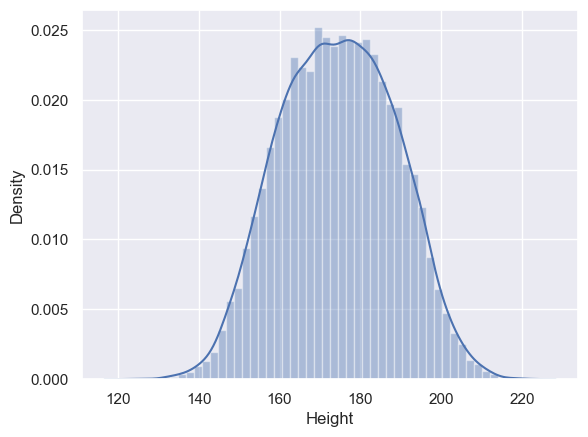

In [11]:
sns.distplot(df['Height'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

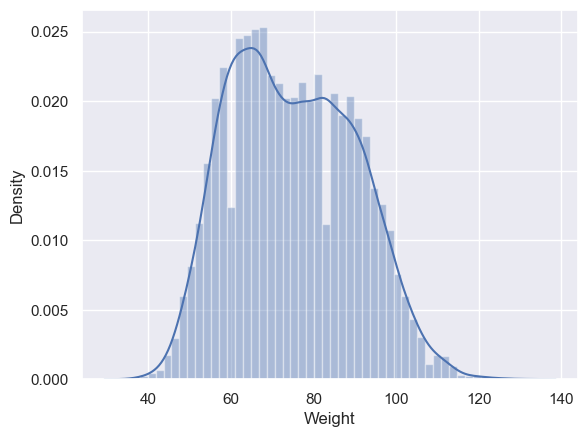

In [12]:
sns.distplot(df['Weight'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Duration', ylabel='Density'>

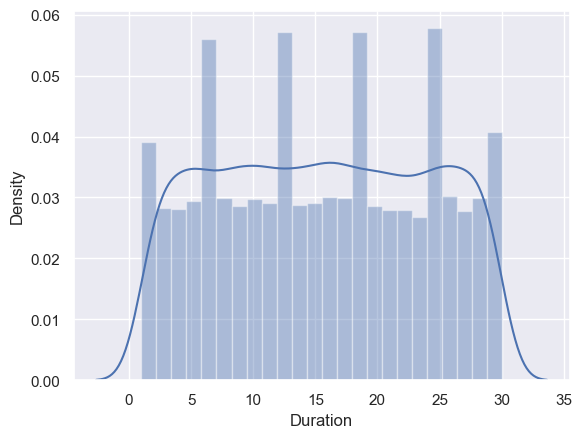

In [13]:
sns.distplot(df['Duration'])

c:\Users\Akash.Kushwaha\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart_Rate', ylabel='Density'>

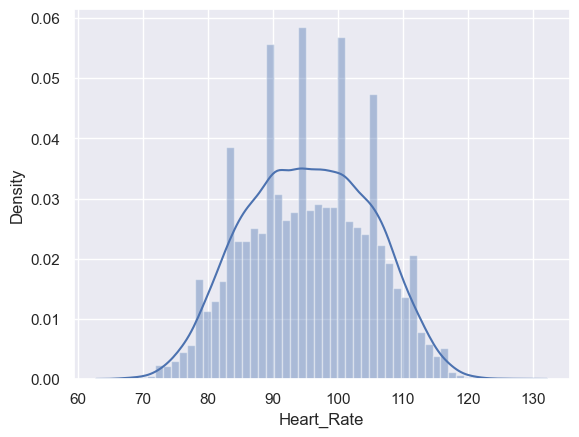

In [14]:
sns.distplot(df['Heart_Rate'])

In [15]:
corr = df.corr()

<AxesSubplot:>

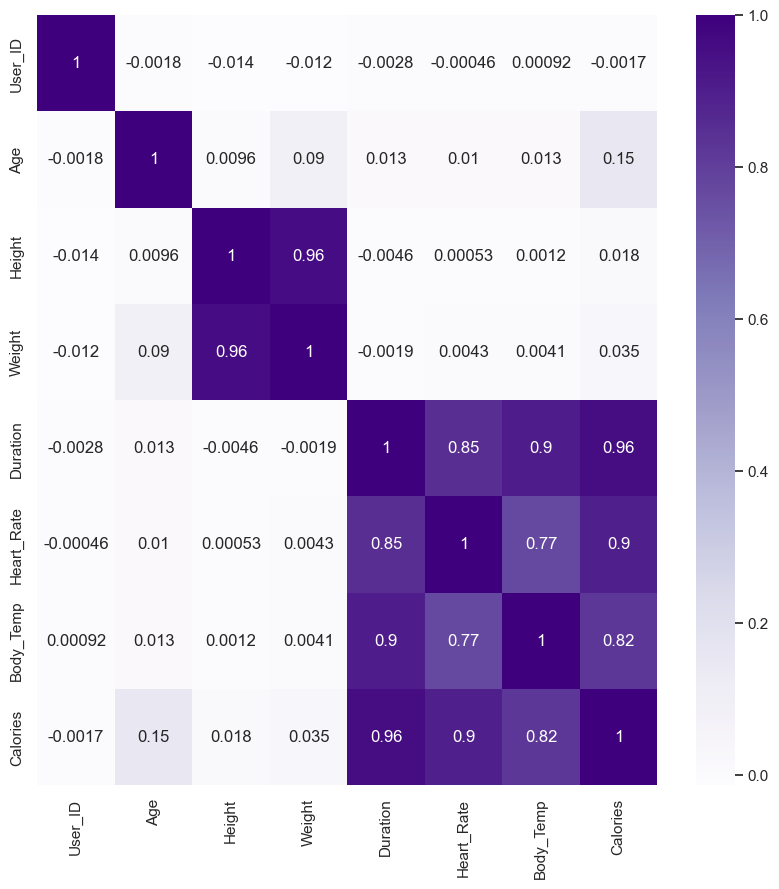

In [17]:
plt.figure(figsize= (10,10))
sns.heatmap(corr,cmap = 'Purples', annot = True)

In [18]:
df.replace({'Gender':{'male':0,'female':1}},inplace = True)

<AxesSubplot:>

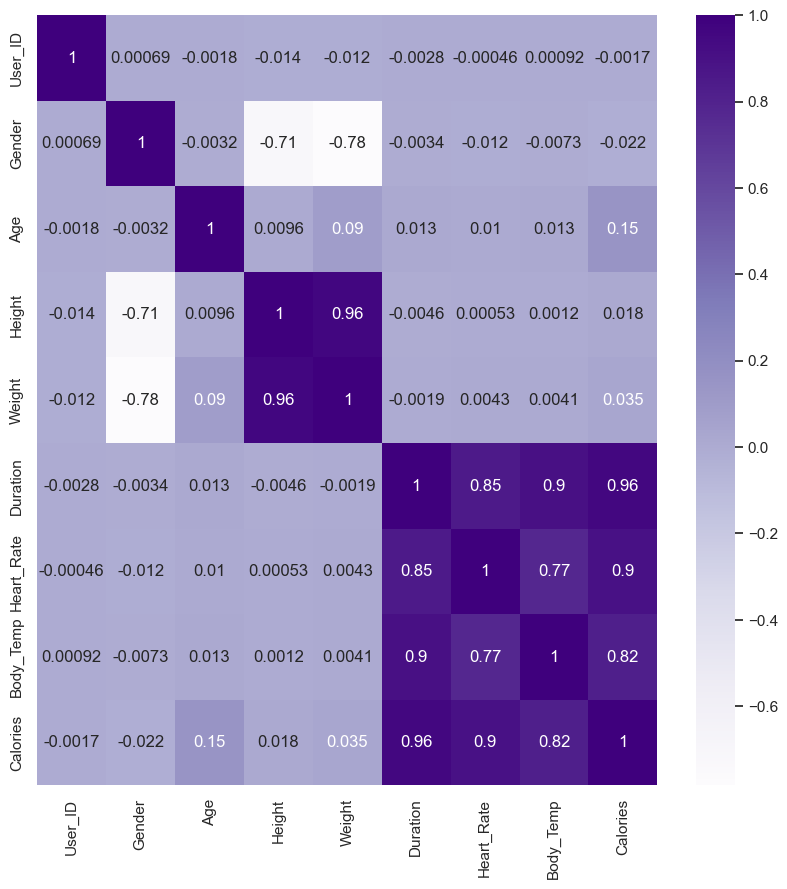

In [20]:
plt.figure(figsize= (10,10))
sns.heatmap(df.corr(),cmap = 'Purples',annot = True)

In [21]:
X = df.drop(['User_ID','Calories'],1)
Y = df.Calories

C:\Users\Akash.Kushwaha\AppData\Local\Temp\ipykernel_11932\4053696741.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(['User_ID','Calories'],1)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [23]:
model = XGBRegressor()

In [24]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
y_train_pred = model.predict(x_train)

In [29]:
metrics.mean_absolute_error(y_train,y_train_pred)

0.9656331550205747

In [27]:
y_test_pred = model.predict(x_test)

In [30]:
metrics.mean_absolute_error(y_test,y_test_pred)

1.4807048829992613